Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Fundamentals of Computer Vision
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Hands-on Activity 6.2 - Training Neural Networks**
**Name** | Dela Cruz, Irish
**Section** | CPE32S3
**Date Performed**: | 03/27/2024
**Date Submitted**: | 04/01/2024
**Instructor**: | Engr. Roman M. Richard

<hr>


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
filepath = "/content/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
250,9,106,52,0,0,31.2,0.380,42,0
300,0,167,0,0,0,32.3,0.839,30,1
763,10,101,76,48,180,32.9,0.171,63,0
593,2,82,52,22,115,28.5,1.699,25,0
269,2,146,0,0,0,27.5,0.240,28,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

### Analysis

Total parameters is 121, which includes the trainable and non-trainable. Trainable patterns is same with total no. of parameters which means that 121 there was learnable during training. There's 0 non-trainable which means that there's no parameters there that can't be updated during the training process.


In [ ]:
diabetes_df.shape

(768, 9)

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5903 - loss: 0.7118 - val_accuracy: 0.5938 - val_loss: 0.6988
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6114 - loss: 0.6972 - val_accuracy: 0.5938 - val_loss: 0.6915
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6205 - loss: 0.6800 - val_accuracy: 0.5990 - val_loss: 0.6845
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6519 - loss: 0.6488 - val_accuracy: 0.6042 - val_loss: 0.6778
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5977 - loss: 0.6927 - val_accuracy: 0.6146 - val_loss: 0.6714
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6937 - loss: 0.6285 - val_accuracy: 0.6198 - val_loss: 0.6652
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6259 - loss: 0.6650 - val_accuracy: 0.6198 - val_loss: 0.6593
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6817 - loss: 0.6248 - val_accuracy: 0.62

In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = np.argmax(y_pred_prob_nn_1, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.47451037],
       [0.48907652],
       [0.29743898],
       [0.33617893],
       [0.17411605],
       [0.41381925],
       [0.04458674],
       [0.29017496],
       [0.77602726],
       [0.25912988]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.641
roc-auc is 0.823


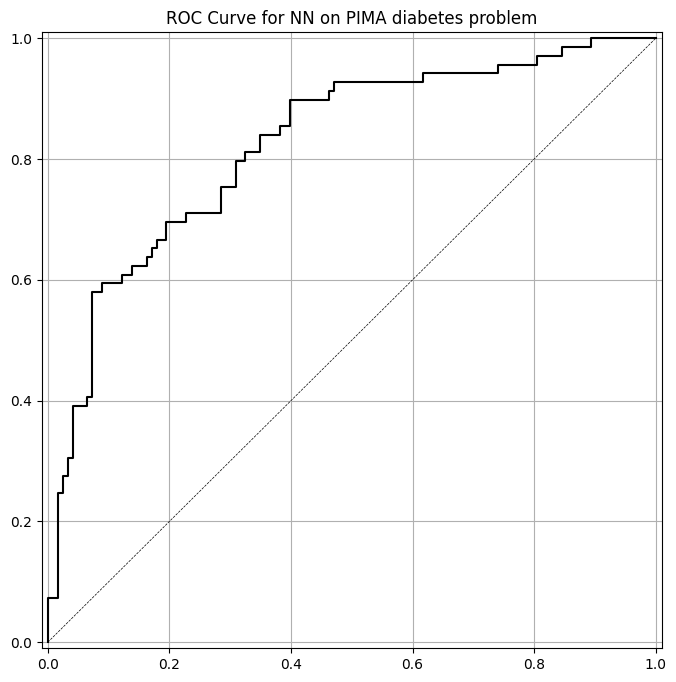

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

### Analysis

The accuray was approximately 64.1%, it's not be the best indicator for imbalanced dataset, where one class has significantly more samples than other. While the ROC-AUC is 82.3%, its indicate high score which means better performance. Since the ROC-AUC was used to distinguised between positive and negative class, with the high score of 82.3% suggessted that the model performs well in distinguishing between the 2 class.

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

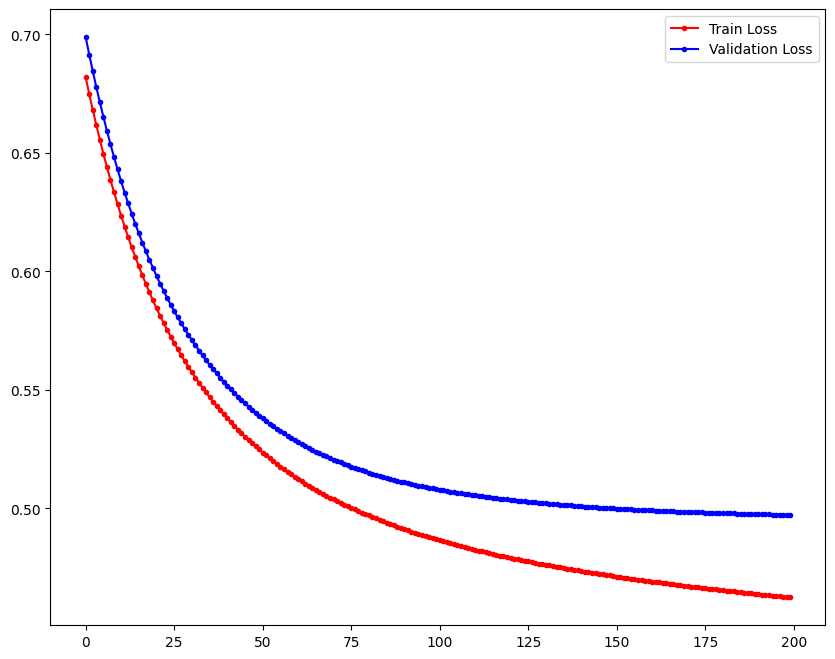

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?


#type your answer
The graph show that when the number of iteration increases  (x-axis ranges from 0 - 200) both training and validation loss decreases (y axis represent as loss or error value, in order to measure whether the model is fitting the training and validation data). The model's performance on training data improves over time.

As you can see the training loss is consistently lower than valitation loss, which means that the model might be overfitting the training data. There's occurence of Overfitting especially when the model learns the training data too well, including the noise and outlier, which negatively impacts its performance on unseen data.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

#### Conclusion
Overall, this activity gives me an insight on how to build and train neural networks that involves several steps like the no. of layers, no. of neurons in each layer, and activitation functions. Also, the compiling model like what optimizer to be used, loss functions, and metrics during training. Then gives me an insight about the model's performance using the validation data and accuracy or ROC. After I saw my graph I visualized that my model's performance (training and validation loss) helps me to understand whether it actually learned or it's overfitting/underfitting. With the practice and experimentation about this activity I can implement a model to achieve a better performance on real-world datasets.

#type your answer here

In [ ]:
dataset = pd.read_csv("/content/heart.csv", na_values="?")
dataset.rename(columns={"target": "has_heart_disease"}, inplace=True)

In [ ]:
dataset["has_heart_disease"].replace(inplace=True, value=[1, 1, 1, 1], to_replace=[1, 2, 3, 4])

np_dataset = dataset.to_numpy()

feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [ ]:
dataset.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,has_heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
dataset.tail(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,has_heart_disease
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                303 non-null    int64  
 1   sex                303 non-null    int64  
 2   cp                 303 non-null    int64  
 3   trestbps           303 non-null    int64  
 4   chol               303 non-null    int64  
 5   fbs                303 non-null    int64  
 6   restecg            303 non-null    int64  
 7   thalach            303 non-null    int64  
 8   exang              303 non-null    int64  
 9   oldpeak            303 non-null    float64
 10  slope              303 non-null    int64  
 11  ca                 303 non-null    int64  
 12  thal               303 non-null    int64  
 13  has_heart_disease  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.isnull().sum()

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
has_heart_disease    0
dtype: int64

In [ ]:
dataset.dtypes
dataset['has_heart_disease'].astype(int)
dataset['has_heart_disease'].value_counts()

1    165
0    138
Name: has_heart_disease, dtype: int64

In [ ]:
Zero = dataset[dataset.has_heart_disease == 0] # absence
One = dataset[dataset.has_heart_disease == 1]  # presence

In [ ]:
ZeroDS = Zero.sample(len(One), replace = True, random_state=100)
OneDB = pd.concat([ZeroDS, One])

In [ ]:
count = OneDB['has_heart_disease'].value_counts()
print(count)

0    165
1    165
Name: has_heart_disease, dtype: int64


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset["has_heart_disease"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=100)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 13-dimensional
* 2 hidden layer, each with 6 nodes using relu activation
* Final layer with one node and sigmoid activation (standard for binary classification)
*   Use a learning rate of .003 and train for 1500 epochs



In [ ]:
model  = Sequential([
    Dense(6, input_shape=(13,), activation="relu"),
    Dense(6, input_shape=(13,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
dataset.shape

(303, 14)

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 6)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
!pip install --upgrade keras

In [175]:
model.compile(SGD(learning_rate = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.6607 - loss: 0.6418 - val_accuracy: 0.5987 - val_loss: 0.6684
Epoch 2/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6077 - loss: 0.6548 - val_accuracy: 0.5987 - val_loss: 0.6681
Epoch 3/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6242 - loss: 0.6456 - val_accuracy: 0.6053 - val_loss: 0.6679
Epoch 4/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6590 - loss: 0.6455 - val_accuracy: 0.6118 - val_loss: 0.6676
Epoch 5/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6208 - loss: 0.6407 - val_accuracy: 0.6184 - val_loss: 0.6674
Epoch 6/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6364 - loss: 0.6433 - val_accuracy: 0.6184 - val_loss: 0.6671
Epoch 7/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6222 - loss: 0.6484 - val_accuracy: 0.6184 - val_loss: 0.6669
Epoch 8/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6529 - loss: 0.6448 - val_accuracy: 0.6184 - 

In [176]:
y_pred_prob_nn_1 = model.predict(X_test_norm)
y_pred_class_nn_1 = np.argmax(y_pred_prob_nn_1, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [177]:
y_pred_class_nn_1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [178]:
y_pred_prob_nn_1[:10]

array([[0.9702111 ],
       [0.00788167],
       [0.00885313],
       [0.98619574],
       [0.7185315 ],
       [0.03045651],
       [0.04497855],
       [0.10267232],
       [0.7419374 ],
       [0.73928463]], dtype=float32)

In [179]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on heart problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.474
roc-auc is 0.885


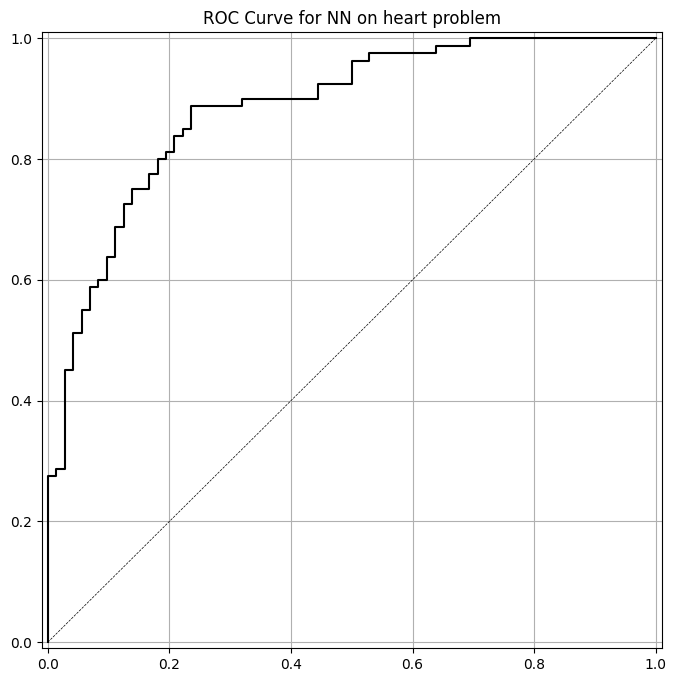

In [180]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

### Analysis

The accuracy is only 47.4% and the ROC-AUC is 84.4% which indicates that the model's performance is relativelt low in terms of accuracy, but does well in distinguishing between the two classes. The ROC curve demonstrate the model's performance at different thresholds.

The x-axis there in the graph represent as the False Positive Rate and the y- axis represent as True Positive Rate. The curve diagonal line there is represent a random classifier. As you can see above the points (0.0) and (0.1) are missing, which makes the curve as straight line. The curve is above from diagonal line which indicates a better performance.



In [181]:
from sklearn import metrics

print('Neural Network:\n {}\n'.format(
    metrics.classification_report(y_pred_class_nn_1, y_test)))

nn_conf_matrix1 = metrics.confusion_matrix(y_pred_class_nn_1, y_test)
conf_mat_nn1 = pd.DataFrame(
    nn_conf_matrix1,
    columns=["Predicted NO", "Predicted YES"],
    index=["Actual NO", "Actual YES"])

print(conf_mat_nn1)

Neural Network:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64       152
           1       0.00      0.00      0.00         0

    accuracy                           0.47       152
   macro avg       0.50      0.24      0.32       152
weighted avg       1.00      0.47      0.64       152


            Predicted NO  Predicted YES
Actual NO             72             80
Actual YES             0              0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Analysis

TN (1st left cell - both actual & predicted was negative (no heart disease at all)
FP (1st righ cell) - Actual is positive (no heart disease) and predicted is positive (can have)
FN (second left cell) - Actual value (has heart disease) but predicted as negative value (predicted as no heart disease)
TP (second right cell) - both is positive (has heart disease)  


The total of True Negative here is 72 which means there's no heart disease among the patients. While there's also saying that 80 among 303 patients - the actual value says no heart disease but the predicted value says they can also have heart disease.

In [182]:
run_hist_1.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

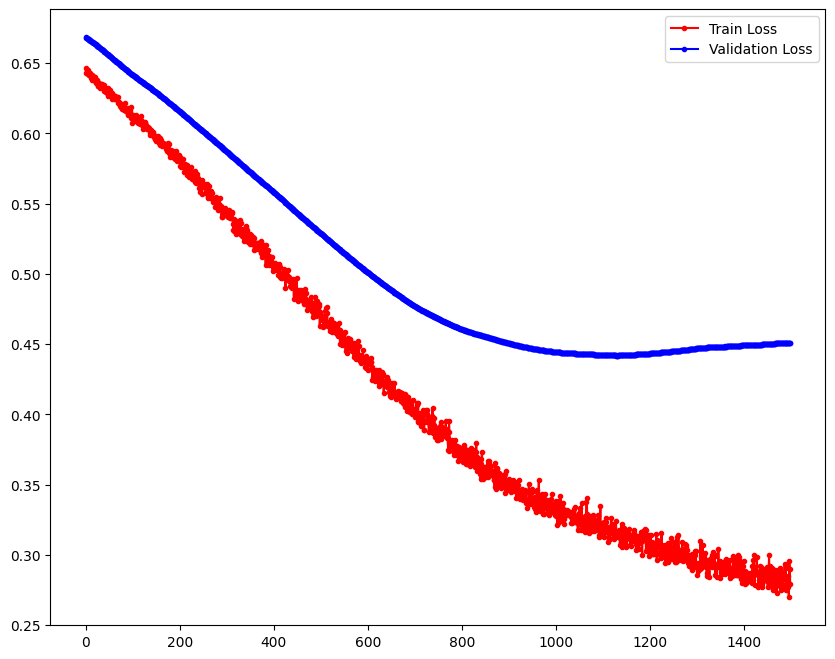

In [183]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(run_hist_1.history["loss"], 'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"], 'b', marker='.', label="Validation Loss")
ax.legend()
plt.show()

### Analysis

It starts with 0.65 (both train and validation loss). As the training progresses, the train loss decreases steadily reaching to 0.25 after 1400 iterations. Which indicates that the model is becoming more accurate predicting the output for the training data.

The validation loss decreases (measures on unseen data of models performance), but it doesn't decrease rapidly as the train loss. Also, the gap between the 2 lines there's overfitting to the training data, the training data learns too well but performs poorly on new data.


# Use different learning rates, numbers of epochs, and network structures.

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.5, random_state=100)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(6, activation='relu', input_shape=input_shape),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 6)                   │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(SGD(learning_rate = 0.7), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.5256 - loss: 0.8555 - val_accuracy: 0.6711 - val_loss: 0.6061
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6241 - loss: 0.6441 - val_accuracy: 0.7368 - val_loss: 0.5538
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6735 - loss: 0.5912 - val_accuracy: 0.7632 - val_loss: 0.5057
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6910 - loss: 0.5238 - val_accuracy: 0.7697 - val_loss: 0.4617
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7081 - loss: 0.5316 - val_accuracy: 0.7961 - val_loss: 0.4710
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7017 - loss: 0.5117 - val_accuracy: 0.8026 - val_loss: 0.4325
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7073 - loss: 0.4760 - val_accuracy: 0.8026 - val_loss: 0.4262
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7945 - loss: 0.4947 - val_accuracy: 0.7961 - val_loss:

In [ ]:
y_pred_prob_nn_2 = model.predict(X_test_norm)
y_pred_class_nn_2 = np.argmax(y_pred_prob_nn_1, axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
y_pred_class_nn_2[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_pred_prob_nn_2[:10]

array([[9.9995345e-01],
       [3.2136320e-06],
       [7.7949046e-08],
       [1.0000000e+00],
       [9.7773604e-02],
       [7.3394142e-07],
       [9.9829006e-01],
       [2.9021932e-03],
       [1.0000000e+00],
       [9.9999905e-01]], dtype=float32)

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on heart problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.474
roc-auc is 0.878


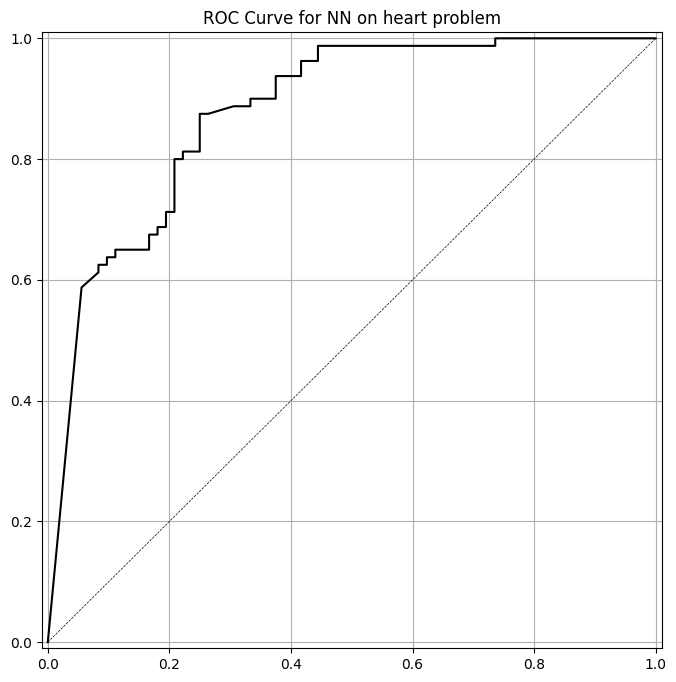

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test, y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

### Analysis

The Accuracy is reported as 47.4% and ROC-AUC score is 87.8%. The curve indicates that the model performs well to distinguish the positive and negative classes. However the accuracy score is very low which suggest that the model could improved for specific task

In [185]:
from sklearn import metrics

print('Neural Network:\n {}\n'.format(
    metrics.classification_report(y_test, y_pred_class_nn_2)))

nn_conf_matrix2 = metrics.confusion_matrix(y_test, y_pred_class_nn_2)
conf_mat_nn2 = pd.DataFrame(
    nn_conf_matrix2,
    columns=["Predicted NO", "Predicted YES"],
    index=["Actual NO", "Actual YES"])

print(conf_mat_nn2)

Neural Network:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64        72
           1       0.00      0.00      0.00        80

    accuracy                           0.47       152
   macro avg       0.24      0.50      0.32       152
weighted avg       0.22      0.47      0.30       152


            Predicted NO  Predicted YES
Actual NO             72              0
Actual YES            80              0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Analysis

TN (1st left cell - both actual & predicted was negative (no heart disease at all)

FP (1st righ cell) - Actual is positive (no heart disease) and predicted is positive (can have)

FN (second left cell) - Actual value (has heart disease) but predicted as negative value (predicted as no heart disease)

TP (second right cell) - both is positive (has heart disease)


Total of 72 correct predictions for negative class (no heart disease at all) and 80 incorrect predictions for positive class which means the there's 80 patients among 303 has heart disease but predicted as no heart disease. The model's performance need further analysis and adjustment to address this kind of problem.


In [ ]:
run_hist_2.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

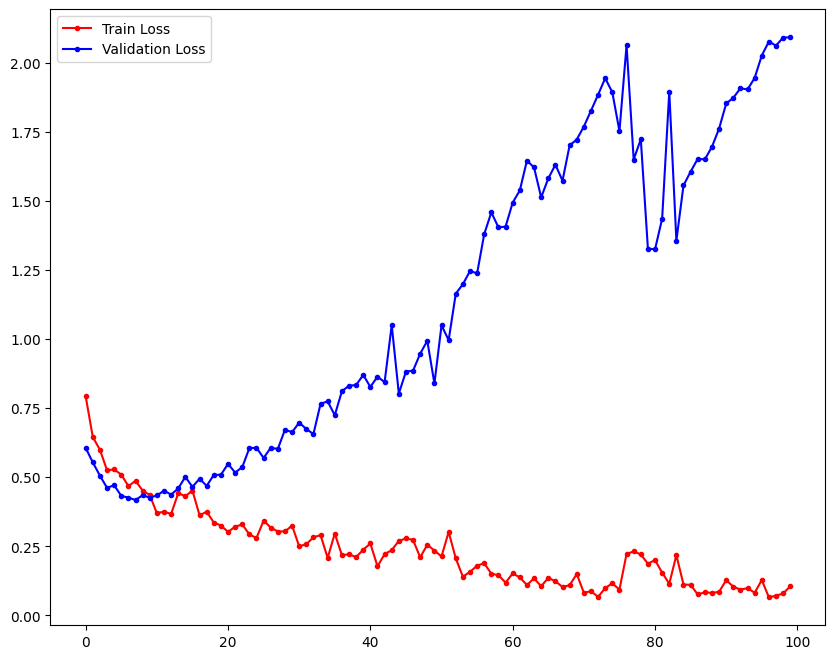

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(run_hist_2.history["loss"], 'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"], 'b', marker='.', label="Validation Loss")
ax.legend()
plt.show()

### Analysis

At the start the training process, the training loss is in the range of 0.75 - 1 and the validation loss is in tha range of 0.5 - 0.75. When the training loss decreases, reaching a minimum of 0.126 at iteration 10. However, the validation loss decreases initially but starts to increase after 5  iterations which indicate that the model may be overfitting to the training data.